In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys, os
sys.path.insert(1, os.path.abspath('../utils/'))
sys.path.insert(1, os.path.abspath('../edg/'))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
data = pd.read_csv('~/Documents/github/ExpectedDiscountedGoal/data/Liverpool-LastRow/liverpool_2019.csv', index_col=('play', 'frame'))
data['edgecolor'] = data['edgecolor'].fillna(0)
data.tail()

Unnamed: 0 bgcolor   dx   dy edgecolor  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120          2745    blue  0.0  0.0     white   
                            121          2746    blue  0.0  0.0     white   
                            122          2747    blue  0.0  0.0     white   
                            123          2748    blue  0.0  0.0     white   
                            124          2749    blue  0.0  0.0     white   

                                   player  player_num     team          x  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120     10267         NaN  defense  98.724826   
                            121     10267         NaN  defense  98.724826   
                            122     10267         NaN  defense  98.724826   
                            123     10267         NaN  defense  98.724826   
                            124     10267         NaN  defense  98.724826   

                                           y    z  
play                        frame                  
Leicester 0 - [3] Liverpool 120    53.720353  0.0  
                            121    53.720353  0.0  
                            122    53.720353  0.0  
                            123    53.720353  0.0  
                            124    53.720353  0.0

In [3]:
from utils import utils, vizu_utils,agent_utils

In [4]:
data_test = utils._add_ball_coordinates(data)
data_test = utils._add_possession(data_test)

In [5]:
play =  'Leicester 0 - [3] Liverpool'
df = data_test[data_test['play'] == play]
df = df.set_index('frame')
df.tail()

,bgcolor,dx,dy,edgecolor,player,player_num,team,x,y,z,ball_x,ball_y,ball_z,play,possession
frame,,,,,,,,,,,,,,,
120,blue,0,0,white,10267,NaN,defense,98.7248,53.7204,0,100.68,44.958,0,Leicester 0 - [3] Liverpool,False
121,blue,0,0,white,10267,NaN,defense,98.7248,53.7204,0,100.68,44.958,0,Leicester 0 - [3] Liverpool,False
122,blue,0,0,white,10267,NaN,defense,98.7248,53.7204,0,100.68,44.958,0,Leicester 0 - [3] Liverpool,False
123,blue,0,0,white,10267,NaN,defense,98.7248,53.7204,0,100.68,44.958,0,Leicester 0 - [3] Liverpool,False
124,blue,0,0,white,10267,NaN,defense,98.7248,53.7204,0,100.68,44.958,0,Leicester 0 - [3] Liverpool,False


In [6]:
df.head()

,bgcolor,dx,dy,edgecolor,player,player_num,team,x,y,z,ball_x,ball_y,ball_z,play,possession
frame,,,,,,,,,,,,,,,
0,NaN,0,0,0,0,NaN,NaN,80.2552,39.0475,0,80.2552,39.0475,0,Leicester 0 - [3] Liverpool,False
1,NaN,0,0,0,0,NaN,NaN,80.2552,39.0475,0,80.2552,39.0475,0,Leicester 0 - [3] Liverpool,False
2,NaN,0,0,0,0,NaN,NaN,80.2552,39.0475,0,80.2552,39.0475,0,Leicester 0 - [3] Liverpool,False
3,NaN,0,0,0,0,NaN,NaN,80.2552,39.0475,0,80.2552,39.0475,0,Leicester 0 - [3] Liverpool,False
4,NaN,0,0,0,0,NaN,NaN,80.2552,39.0475,0,80.2552,39.0475,0,Leicester 0 - [3] Liverpool,False


In [7]:
df['bgcolor'] = df['bgcolor'].fillna('black')

In [8]:
data_google = utils._save_data(df,'test_temo.dump')

In [9]:
observations = {
    'frame_count':[],
    'obs':[],
    'obs_count':[],
    'value':[]
}

for i in range(len(data_google)):
    obs,obs_count = utils._build_obs_stacked(data_google,i)
    observations['frame_count'].append(i)
    observations['obs'].append(obs)
    observations['obs_count'].append(obs_count)

In [10]:
from agent import AgentValue

In [11]:
checkpoints = 'checkpoints/11_vs_11_easy_stochastic_v2'
agent = AgentValue(checkpoints = checkpoints)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.


In [139]:
np.argwhere(observations['obs'][20][:,:,2] > 0.)

array([[71, 95]])

In [12]:
map_value = agent.get_edg_map(observations['obs'][20],observations['obs_count'][20],79,57,entity = 'ball')

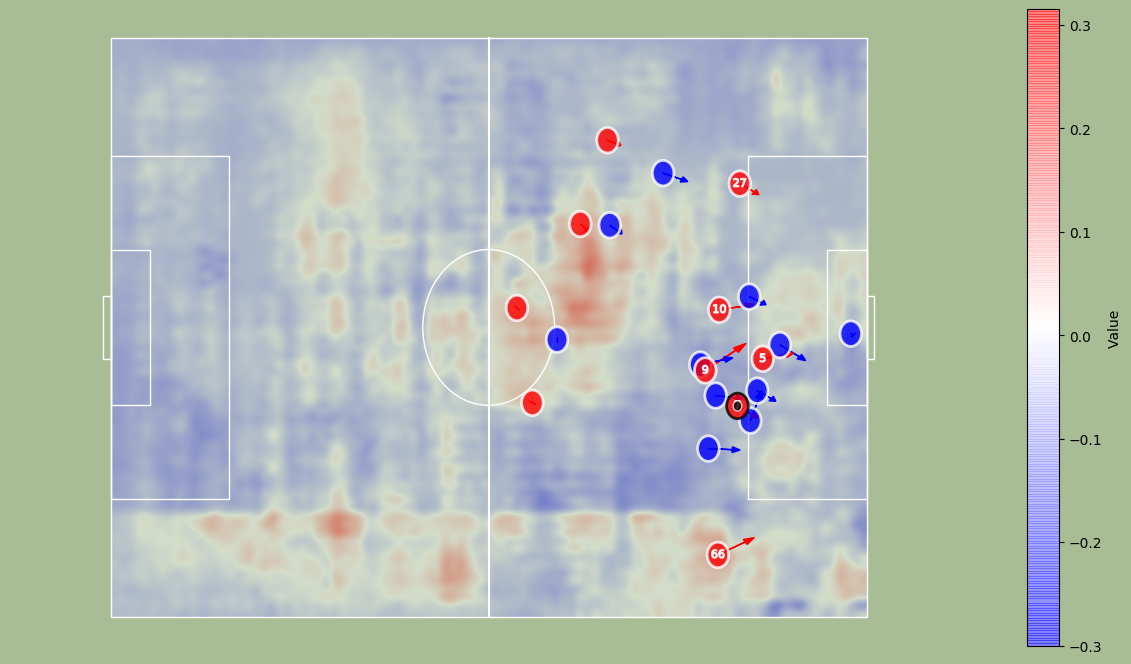

In [138]:
fig, ax, dfFrame = vizu_utils.draw_frame(df, t=1,add_vector = True)
fig, ax, edg_map = add_edg_to_fig(fig, ax, map_value)